In [138]:
import osmnx as ox
from DataInterface.GeoDataInterface import GeoData, GeoDataType
from DataInterface.AdminDataInterface import AdminData
import pandas as pd
import geopandas as gpd
import os
import webbrowser
from DataPreprocessing.OSM.TransportData import TransportDataDownloader
from Utils import City

In [3]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [188]:
def plot_map(g):
    html_map = g.explore(legend=True, tiles="CartoDB positron")
    html_map.save(f'temp/public_transport_paris_map.html')
    webbrowser.open('file://' + os.path.realpath(f'temp/public_transport_paris_map.html'))


In [5]:
geo_data = GeoData()
geo_data.load(GeoDataType.IRIS)

In [ ]:
iris_geo_data = geo_data.get_geo_data(geometry=GeoDataType.IRIS, other_geo_data_types=GeoDataType.CITY)
city_geo_data = iris_geo_data[[GeoDataType.CITY.value, 'geometry']].dissolve(by=GeoDataType.CITY.value).reset_index()

In [189]:
tours = iris_geo_data[iris_geo_data[GeoDataType.CITY.value] == City.TOURS.value]
plot_map(tours)

In [187]:
for city in City:
    print(city)
    polygon = city_geo_data[city_geo_data[GeoDataType.CITY.value] == city.value]['geometry'].iloc[0]
    gdf = ox.geometries_from_polygon(polygon=polygon, tags={'landuse': True})
    d = gdf[['geometry', 'landuse']]
    plot_map(d)


City.BORDEAUX
City.CLERMONT_FERRAND
City.DIJON
City.GRENOBLE
City.LILLE
City.LYON
City.MANS
City.MARSEILLE
City.METZ
City.MONTPELLIER
City.NANCY
City.NANTES
City.NICE
City.ORLEANS
City.PARIS
City.RENNES
City.SAINT_ETIENNE
City.STRASBOURG
City.TOULOUSE
City.TOURS


In [170]:
city = City.PARIS
polygon = city_geo_data[city_geo_data[GeoDataType.CITY.value] == city.value]['geometry'].iloc[0]

In [171]:
gdf = ox.geometries_from_polygon(polygon=polygon, tags={'landuse': ['commercial', 'construction', 'education', 'fairground']})

In [183]:
d = gdf[['geometry', 'landuse']]
d= d[d['landuse'] != 'residential']

In [184]:
plot_map(d)

In [169]:
for city in [City.MANS]:
    print(city)
    downloader = TransportDataDownloader(city=city, city_geometry=city_geo_data[city_geo_data[GeoDataType.CITY.value] == city.value])
    transport_map = downloader.download()
    plot_map(transport_map)

City.MANS


In [165]:
city = City.LYON
downloader = TransportDataDownloader(city=city, city_geometry=city_geo_data[city_geo_data[GeoDataType.CITY.value] == city.value])

In [166]:
map = downloader.download()

In [167]:
plot_map(map)

In [134]:
plot_map(paris)

In [96]:
gdf = ox.geometries_from_polygon(polygon=paris_polygon, tags={'public_transport': 'stop_position'})

In [113]:
gdf.shape, list(gdf.columns)

((10470, 140),
 ['bus',
  'name',
  'public_transport',
  'geometry',
  'curve_geometry',
  'source',
  'railway',
  'subway',
  'ref',
  'train',
  'network',
  'operator',
  'STIF:zone',
  'official_name',
  'opening_date',
  'ref:FR:STIF',
  'uic_ref',
  'wheelchair',
  'wikidata',
  'wikipedia',
  'level',
  'ref:FR:uic8',
  'tactile_paving',
  'uic_name',
  'layer',
  'tram',
  'type:RATP',
  'ref:FR:RATP',
  'local_ref',
  'survey:date',
  'name:ru',
  'old_name',
  'start_date',
  'ref:FR:FANTOIR',
  'station',
  'name:de',
  'name:es',
  'name:it',
  'name:pt',
  'check_date:wheelchair',
  'bench',
  'shelter',
  'network:wikidata',
  'operator:wikidata',
  'light_rail',
  'railway:position:exact',
  'from',
  'ref:SNCF',
  'ref:SNCF:RER',
  'alt_name',
  'heritage',
  'heritage:operator',
  'mhs:inscription_date',
  'ref:mhs',
  'source:heritage',
  'HSR',
  'maxspeed',
  'rail',
  'addr:city',
  'addr:postcode',
  'addr:street',
  'ref:FR:SNCF_Reseau:GAIA',
  'note',
  'descr

In [123]:
plot_map(gdf[gdf['train'].notna()][['geometry', 'train', 'name']])

In [132]:
train = gdf[gdf['bus'].notna()][['geometry', 'bus', 'name']]
#train = train.groupby(by='name').agg({'geometry': 'first', 'bus': 'first'}).reset_index()
train = gpd.GeoDataFrame(train, geometry='geometry', crs=gdf.crs)
plot_map(train)

In [105]:
gdf.head()

bus                      name public_transport   
element_type osmid                                                      
node         361719    yes            Place d'Italie    stop_position  \
             367913    yes          Wagram - Pereire    stop_position   
             644100    yes  Évangile - Aubervilliers    stop_position   
             12388528  NaN       Châtillon-Montrouge    stop_position   
             14803143  yes      Suresnes – De Gaulle    stop_position   

                                       geometry curve_geometry   
element_type osmid                                               
node         361719    POINT (2.35606 48.83173)            NaN  \
             367913    POINT (2.30498 48.88748)            yes   
             644100    POINT (2.36949 48.89524)            NaN   
             12388528  POINT (2.30159 48.81081)            NaN   
             14803143  POINT (2.22397 48.86829)            NaN   

                               source railway subway  ref train  ...   
element_type osmid                                               ...   
node         361719               NaN     NaN    NaN  NaN   NaN  ...  \
             367913               NaN     NaN    NaN  NaN   NaN  ...   
             644100    survey 10/2017     NaN    NaN  NaN   NaN  ...   
             12388528             NaN    stop    yes  NaN   NaN  ...   
             14803143             NaN     NaN    NaN  NaN   NaN  ...   

                      camera:type check_date man_made surveillance   
element_type osmid                                                   
node         361719           NaN        NaN      NaN          NaN  \
             367913           NaN        NaN      NaN          NaN   
             644100           NaN        NaN      NaN          NaN   
             12388528         NaN        NaN      NaN          NaN   
             14803143         NaN        NaN      NaN          NaN   

                      surveillance:type indoor construction_date ferry phone   
element_type osmid                                                             
node         361719                 NaN    NaN               NaN   NaN   NaN  \
             367913                 NaN    NaN               NaN   NaN   NaN   
             644100                 NaN    NaN               NaN   NaN   NaN   
             12388528               NaN    NaN               NaN   NaN   NaN   
             14803143               NaN    NaN               NaN   NaN   NaN   

                      website  
element_type osmid             
node         361719       NaN  
             367913       NaN  
             644100       NaN  
             12388528     NaN  
             14803143     NaN  

[5 rows x 140 columns]

In [108]:
gdf_sel = gdf[['geometry', 'subway', 'train', 'tram', 'bus', 'funicular', 'ferry']]
gdf_sel = gdf_sel[gdf_sel['train'].notna()]
html_map = gdf_sel.explore(legend=True, tiles="CartoDB positron", cmap='plasma')
html_map.save(f'temp/public_transport_paris_map.html')
webbrowser.open('file://' + os.path.realpath(f'temp/public_transport_paris_map.html'))

True

In [73]:
merge_rest

,geometry,city,EQUIP_A504
iris,,,
751145309,"POLYGON ((2.33059 48.83933, 2.33055 48.83945, ...",Paris,21.0
751155915,"POLYGON ((2.29238 48.85073, 2.29216 48.85092, ...",Paris,12.0
751145608,"POLYGON ((2.31175 48.83068, 2.31224 48.83092, ...",Paris,15.0
751051802,"POLYGON ((2.35187 48.83680, 2.35174 48.83697, ...",Paris,25.0
751166212,"POLYGON ((2.27788 48.85621, 2.27767 48.85712, ...",Paris,23.0
751166219,"POLYGON ((2.28103 48.86023, 2.28092 48.86030, ...",Paris,7.0
920730116,"POLYGON ((2.23009 48.87387, 2.22961 48.87409, ...",Paris,14.0
920620301,"POLYGON ((2.23052 48.87994, 2.23011 48.88013, ...",Paris,3.0


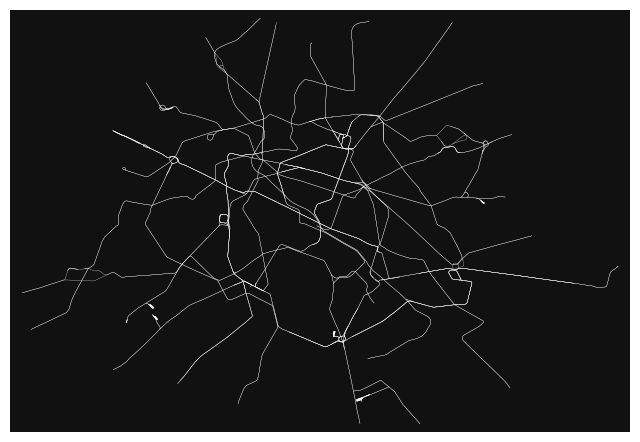

In [43]:
G = ox.graph_from_place(
    "Paris, France",
    retain_all=False,
    truncate_by_edge=True,
    simplify=True,
    custom_filter='["railway"~"subway"]',
)

fig, ax = ox.plot_graph(G, node_size=0, edge_color="w", edge_linewidth=0.2)